In [1]:
PATH = '/home/jim'
import sys
sys.path.append(PATH)

import meteocpy as mpy
from meteocpy.forward import apex
from meteocpy.utils import load_params, BiDict

import numpy as np
import torch

import os
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from importlib import reload
reload(apex)
reload(mpy.utils)

<module 'meteocpy.utils' from '/home/jim/meteocpy/utils.py'>

In [4]:
#ap = apex.load_apex(binned_vnir_swir='/Users/jim/meteoc/params/binned', binned_meta='/Users/jim/meteoc/params/meta', vnir_it=27000, swir_it=15000)
ap = apex.load_apex(unbinned_vnir='/home/jim/meteoc/params/unbinned', binned_vnir_swir='/home/jim/meteoc/params/binned', 
                    binned_meta='/home/jim/meteoc/params/binned_meta', vnir_it=27000, swir_it=15000)

/home/jim/meteocpy/forward/apex.py:123: UserWarning: WARNING: you loaded unbinned calibration files but meta files are binned. Make sure tocall initialize_srfs with kwarg do_bin=True.
  warnings.warn('WARNING: you loaded unbinned calibration files but meta files are binned. Make sure to'


None [241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286]
[ 0  2  4  6  8 10 12 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66] [241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286] 46
None [241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286]
[ 0  2  4  6  8 10 12 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48

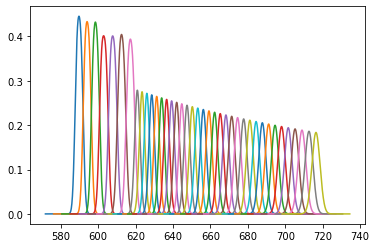

In [5]:
%matplotlib inline
ap.initialize_srfs([600, 700], abs_res=0.1, srf_support_in_sigma=3, zero_out=True, do_bin=True)

_ = plt.plot(np.array(ap.model.binned.wvls[:, 500]).transpose(), 
             np.array(ap.model.binned.srfs[0, :, 500]).transpose())
#plt.figure()
#_ = plt.plot(np.array(ap.model.unbinned.wvls[:, 500]).transpose(), 
#             np.array(ap.model.unbinned.srfs[0, :, 500]).transpose())

None [241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286]
[ 0  2  4  6  8 10 12 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66] [241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286] 46
None [241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286]
[ 0  2  4  6  8 10 12 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48

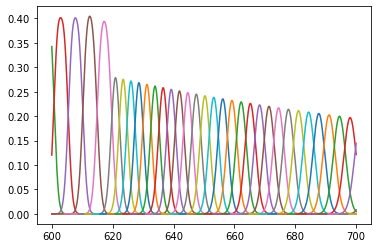

In [7]:
%matplotlib inline
ap.initialize_srfs(exact_wvls=np.arange(600, 700, 0.01), srf_support_in_sigma=3, zero_out=True, do_bin=True)
plt.figure()
for i in range(len(ap.model.binned.wvls)):
    _ = plt.plot(np.array(ap.model.binned.wvls[i]).transpose(), 
                 np.array(ap.model.binned.srfs[i][0, 500, :]).transpose())
plt.show()

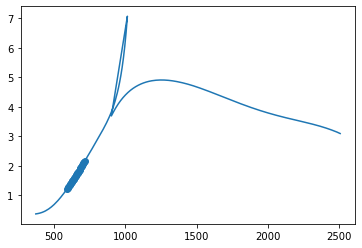

In [8]:
plt.figure()
plt.scatter(ap.params.binned.cw[ap.model.binned.srf_bands][:, 500], ap.params.binned.fwhm[ap.model.binned.srf_bands][:, 500] * ap.FWHM_TO_SIGMA)
plt.plot(ap.params.binned.cw[:, 500], ap.params.binned.fwhm[:, 500] * ap.FWHM_TO_SIGMA)


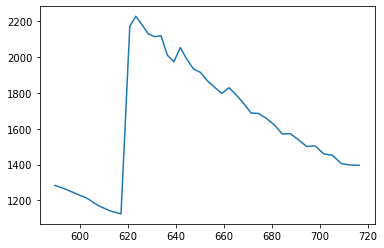

In [9]:
%matplotlib inline
plt.plot(ap.params.binned.cw[ap.model.binned.srf_bands][:, 500], ap.params.binned.rad_coeffs['gain'][ap.model.binned.srf_bands][:, 500])

In [10]:
res, illu_bands = ap.forward(inp_spectrum=np.array([1e6, 1e6,1e6, 1e5, 1e6, 1e6, 1e4]).reshape(1, 1, -1), 
                             inp_wvlens=np.arange(600, 607, 1).reshape(1, -1), pad=False, part_covered=True,
                             invert=True, snr=True, dc=True, smear=True, return_binned=False, run_specs=dict(joblib=False))

/home/jim/miniconda3/envs/meteocpy/lib/python3.6/site-packages/numba/core/ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'weights_per_band' of function 'convolve_non_aligned'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../forward/apex.py", line 17:
@nb.jit(nopython=True)
def convolve_non_aligned(inp, weights=None, weights_per_band=None,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


(1, 7, 1000)
(1, 14, 1000) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] [241 242 243 244 245 246 247 248 249 250 251 252 253 254]
[ 0  2  4  6  8 10 12] [28 29 30 31 32 33 34] [241 242 243 244 245 246 247 248 249 250 251 252 253 254] 14
after (1, 7, 1000)


In [11]:
ap.model.binned

{'srfs': [array([[[4.54248021e-13, 4.27493733e-13, 4.02288101e-13, ...,
           3.56658183e-16, 3.33149778e-16, 3.11169907e-16],
          [4.52543118e-13, 4.25887466e-13, 4.00774868e-13, ...,
           3.55154831e-16, 3.31744130e-16, 3.09855703e-16],
          [4.50844498e-13, 4.24287126e-13, 3.99267224e-13, ...,
           3.53657723e-16, 3.30344328e-16, 3.08546971e-16],
          ...,
          [1.72335740e-14, 1.61613659e-14, 1.51548449e-14, ...,
           9.14240504e-18, 8.50969105e-18, 7.92023110e-18],
          [1.71694164e-14, 1.61011369e-14, 1.50983078e-14, ...,
           9.10441141e-18, 8.47429364e-18, 7.88725476e-18],
          [1.71054938e-14, 1.60411287e-14, 1.50419782e-14, ...,
           9.06657361e-18, 8.43904155e-18, 7.85441394e-18]]]),
  array([[[3.46001016e-04, 3.35891357e-04, 3.26056161e-04, ...,
           3.63189177e-16, 3.39816132e-16, 3.17926839e-16],
          [3.45290143e-04, 3.35199762e-04, 3.25383366e-04, ...,
           3.61516536e-16, 3.38249625e-16,

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_frame(ind, channel=0, vmax=None, vmin=None, figsize=None, binned='binned'):
    tostr = lambda f: "%.2f" % f
    wvls = list(map(tostr, ap.params[binned].cw[illu_bands[ind]].mean(axis=1)))
    
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    
    im = axs[0].matshow(res[ind][channel], aspect='auto', vmax=vmax, vmin=vmin)
    axs[0].set_yticklabels([''] + wvls)
    
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes('right', size='1%', pad=0.05)
    plt.gcf().colorbar(im, cax=cax)
    
    axs[1].plot(wvls, res[ind][channel][:, [250, 500, 750]], '-o')
    axs[1].set_ylim([np.min(res[ind][channel][:, [250, 500, 750]]) * 0.9, np.max(res[ind][channel][:, [250, 500, 750]]) * 1.1])

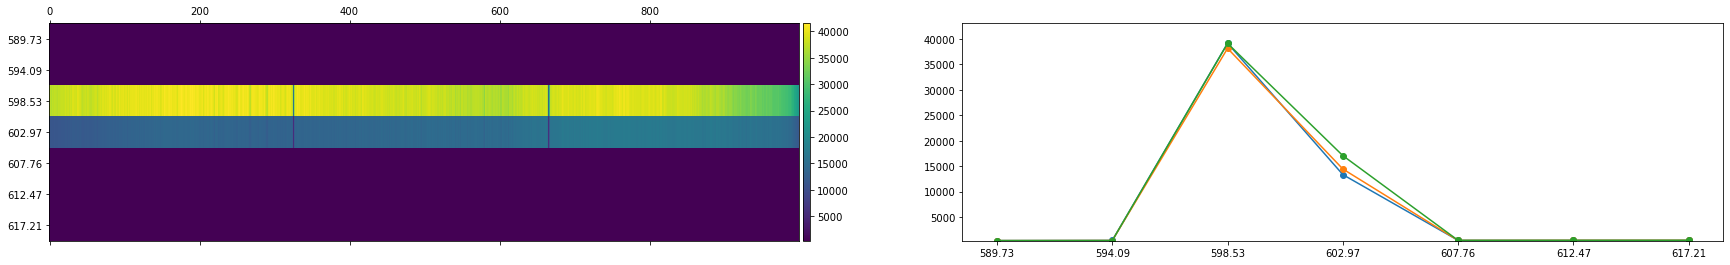

In [12]:
%matplotlib inline
inds = [0]
channel = 0
for ind in inds:
    plot_frame(ind, channel=channel, vmax=None, vmin=None, figsize=(30, 4), binned='binned')

In [9]:
res[0].shape

(1, 3, 1000)

In [346]:
ap.bin_bands(ap.unbinn)

369.16421706295154

In [42]:
ap.srfs[0, ap.shift_bands_to_local(ap.srf_bands)].shape

(68, 1000, 101)

In [43]:
ap.binning_pattern[ap.srf_bands]

array([ 2,  1, 23, 24, 27, 22, 19, 15, 13, 11,  9,  9,  8,  8,  7,  6,  5,
        5,  4,  4,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

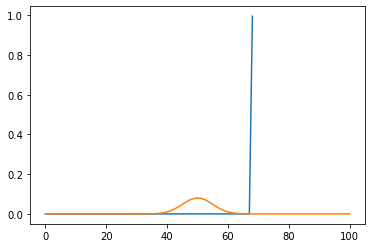

In [49]:
plt.plot(a[0, 14, 500, :])
plt.plot(ap.srfs[0, 7, 500, :])                               

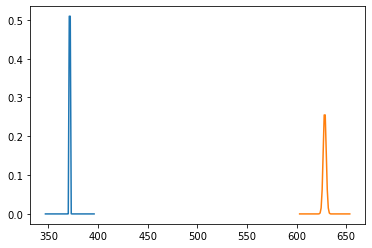

In [266]:
plt.plot(ap.wvls[1, 500, :], ap.srfs[0, 1, 500, :] / np.sum(ap.srfs[0, 1, 500, :]) / (ap.wvls[1, 500, -1] - ap.wvls[1, 500, 0]) * ap.srfs.shape[-1])
plt.plot(ap.wvls[39, 500, :], ap.srfs[0, 39, 500, :] / np.sum(ap.srfs[0, 39, 500, :]) / (ap.wvls[39, 500, -1] - ap.wvls[39, 500, 0]) * ap.srfs.shape[-1])
                                                              

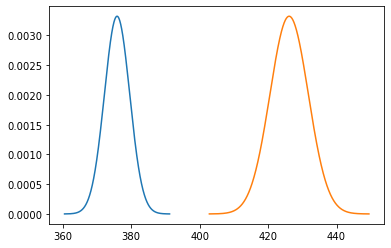

In [277]:
plt.plot(ap.wvls[2, 500, :], ap.srfs[0, 2, 500, :]/ np.sum(ap.srfs[0, 2, 500, :]))
plt.plot(ap.wvls[6, 500, :], ap.srfs[0, 6, 500, :] / np.sum(ap.srfs[0, 6, 500, :]))
                                                              

In [51]:
sum(ap.binning_pattern)

338

In [62]:
ap.rad_coeffs['gain'].shape

(316, 1000)